In [ ]:
import nltk
from IPython.display import clear_output

nltk.download('all')
from nltk.corpus import wordnet as wn
clear_output()

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os, pickle, re, string
from string import punctuation
import pandas as pd
import nltk
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from nltk import pos_tag, ne_chunk
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [ ]:
df = pd.read_csv("/content/processed_data.csv")
df

,Title,Content,Link,Category
0,تيرتل تري لابز للتقنيات الحيويه تحصل علي تمويل...,جاءت جوله التمويل التمهيديه الاولي للشركه بقيا...,https://ryadiybusiness.com/%d8%aa%d9%8a%d8%b1%...,ريادة أعمال
1,تعد دراسه الجدوي لمشروعك الناشء 6 عوامل اساسيه,تعد دراسه الجدوي متطلبا اساسيا لنجاح اي مشروع ...,https://ryadiybusiness.com/%d9%83%d9%8a%d9%81-...,ريادة أعمال
2,منح جاءزه نوبل الطب لاكتشاف مجال التهاب الكبد ...,وقالت لجنه نوبل للمره الاولي التاريخ يمكن الان...,https://arabic.sputniknews.com/science/2020100...,علوم وتكنولوجيا
3,هيءه الغذاء والدواء الامريكيه لقاح مودرنا حقق ...,نشرت الوكاله وثاءق علي الانترنت اعدها موظفوها ...,https://arabic.sputniknews.com/world/202012151...,علوم وتكنولوجيا
4,حظر بروتين الجهاز المناعي يساعد علي محاربه عدو...,دراسه حديثه قام فريق العلماء جونز هوبكنز ميديس...,https://arabic.rt.com//technology/1161864-%D8%...,علوم وتكنولوجيا
...,...,...,...,...
8394,قواعد اوروبيه تهدد بخفض 10 ايرادات شركات التكن...,قالت وكاله بلومبرغ الاثنين ان كبري شركات التكن...,https://asharq.com/ar/7vNsbHVkd9fTQhBQI70ASx-ق...,علوم وتكنولوجيا
8395,حوار خاص مهندس سعودي نباتك فكره تهدف لزراعه مل...,بدات الفكره نعومه اظفاره عندما كان السابعه عمر...,https://news.un.org/ar/story/2020/09/1062802,أخرى
8396,كريم تطلق خدمه اطلب اي شيء الجديده,اعلنت منصه كريم 4 فبراير الجاري اطلاق خدمه اطل...,https://ryadiybusiness.com/%d9%83%d8%b1%d9%8a%...,ريادة أعمال
8397,تقرير اممي جديد يشير الي تاثير جاءحه فيروس كور...,وفقا لتقديرات المكتب الاممي المعني بالمخدرات و...,https://news.un.org/ar/story/2020/06/1057232,أخرى


# # # **EDA**

In [ ]:
df = df.dropna()
df

,Title,Content,Link,Category
0,تيرتل تري لابز للتقنيات الحيويه تحصل علي تمويل...,جاءت جوله التمويل التمهيديه الاولي للشركه بقيا...,https://ryadiybusiness.com/%d8%aa%d9%8a%d8%b1%...,ريادة أعمال
1,تعد دراسه الجدوي لمشروعك الناشء 6 عوامل اساسيه,تعد دراسه الجدوي متطلبا اساسيا لنجاح اي مشروع ...,https://ryadiybusiness.com/%d9%83%d9%8a%d9%81-...,ريادة أعمال
2,منح جاءزه نوبل الطب لاكتشاف مجال التهاب الكبد ...,وقالت لجنه نوبل للمره الاولي التاريخ يمكن الان...,https://arabic.sputniknews.com/science/2020100...,علوم وتكنولوجيا
3,هيءه الغذاء والدواء الامريكيه لقاح مودرنا حقق ...,نشرت الوكاله وثاءق علي الانترنت اعدها موظفوها ...,https://arabic.sputniknews.com/world/202012151...,علوم وتكنولوجيا
4,حظر بروتين الجهاز المناعي يساعد علي محاربه عدو...,دراسه حديثه قام فريق العلماء جونز هوبكنز ميديس...,https://arabic.rt.com//technology/1161864-%D8%...,علوم وتكنولوجيا
...,...,...,...,...
8394,قواعد اوروبيه تهدد بخفض 10 ايرادات شركات التكن...,قالت وكاله بلومبرغ الاثنين ان كبري شركات التكن...,https://asharq.com/ar/7vNsbHVkd9fTQhBQI70ASx-ق...,علوم وتكنولوجيا
8395,حوار خاص مهندس سعودي نباتك فكره تهدف لزراعه مل...,بدات الفكره نعومه اظفاره عندما كان السابعه عمر...,https://news.un.org/ar/story/2020/09/1062802,أخرى
8396,كريم تطلق خدمه اطلب اي شيء الجديده,اعلنت منصه كريم 4 فبراير الجاري اطلاق خدمه اطل...,https://ryadiybusiness.com/%d9%83%d8%b1%d9%8a%...,ريادة أعمال
8397,تقرير اممي جديد يشير الي تاثير جاءحه فيروس كور...,وفقا لتقديرات المكتب الاممي المعني بالمخدرات و...,https://news.un.org/ar/story/2020/06/1057232,أخرى


In [ ]:
df.shape

(8386, 4)

In [ ]:
df.columns

Index(['Title', 'Content', 'Link', 'Category'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8386 entries, 0 to 8398
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     8386 non-null   object
 1   Content   8386 non-null   object
 2   Link      8386 non-null   object
 3   Category  8386 non-null   object
dtypes: object(4)
memory usage: 327.6+ KB


In [ ]:
df.isnull().sum()

Title       0
Content     0
Link        0
Category    0
dtype: int64

In [ ]:
df['Category'].value_counts()

Category
علوم وتكنولوجيا    2800
أخرى               2796
ريادة أعمال        2790
Name: count, dtype: int64

In [ ]:
df.Category.unique()

array(['ريادة أعمال', 'علوم وتكنولوجيا', 'أخرى'], dtype=object)

In [ ]:
len(df['Category'].unique())

3

# ****## Preprocessing****

In [ ]:
df=df.drop(['Link'],axis=1)
df

,Title,Content,Category
0,تيرتل تري لابز للتقنيات الحيويه تحصل علي تمويل...,جاءت جوله التمويل التمهيديه الاولي للشركه بقيا...,ريادة أعمال
1,تعد دراسه الجدوي لمشروعك الناشء 6 عوامل اساسيه,تعد دراسه الجدوي متطلبا اساسيا لنجاح اي مشروع ...,ريادة أعمال
2,منح جاءزه نوبل الطب لاكتشاف مجال التهاب الكبد ...,وقالت لجنه نوبل للمره الاولي التاريخ يمكن الان...,علوم وتكنولوجيا
3,هيءه الغذاء والدواء الامريكيه لقاح مودرنا حقق ...,نشرت الوكاله وثاءق علي الانترنت اعدها موظفوها ...,علوم وتكنولوجيا
4,حظر بروتين الجهاز المناعي يساعد علي محاربه عدو...,دراسه حديثه قام فريق العلماء جونز هوبكنز ميديس...,علوم وتكنولوجيا
...,...,...,...
8394,قواعد اوروبيه تهدد بخفض 10 ايرادات شركات التكن...,قالت وكاله بلومبرغ الاثنين ان كبري شركات التكن...,علوم وتكنولوجيا
8395,حوار خاص مهندس سعودي نباتك فكره تهدف لزراعه مل...,بدات الفكره نعومه اظفاره عندما كان السابعه عمر...,أخرى
8396,كريم تطلق خدمه اطلب اي شيء الجديده,اعلنت منصه كريم 4 فبراير الجاري اطلاق خدمه اطل...,ريادة أعمال
8397,تقرير اممي جديد يشير الي تاثير جاءحه فيروس كور...,وفقا لتقديرات المكتب الاممي المعني بالمخدرات و...,أخرى


In [ ]:
df.shape

(8386, 3)

In [ ]:
df.columns

Index(['Title', 'Content', 'Category'], dtype='object')

In [ ]:
arabic_stopwords = stopwords.words("arabic")
len(arabic_stopwords)

754

In [ ]:
# Perform text preprocessing
def preprocess(text):
    def remove_punctuation(text):
        return text.translate(str.maketrans("", "", string.punctuation))

    def tokenize(text):
        return nltk.word_tokenize(text)

    def lemmatize(tokens):
        stemmer = LancasterStemmer()
        return [stemmer.stem(token) for token in tokens]

    def remove_stopwords(tokens):
        stop_words = set(stopwords.words("arabic"))
        return [token for token in tokens if token.lower() not in stop_words]

    text = remove_punctuation(text)
    tokenized = tokenize(text)
    lemmatized = lemmatize(tokenized)
    without_stopwords = remove_stopwords(lemmatized)

    return (tokenized, lemmatized, without_stopwords)

In [ ]:
# Apply preprocessing to the 'Content' column
processed_text = df['Content'].apply(preprocess)

print(processed_text)

0       ([جاءت, جوله, التمويل, التمهيديه, الاولي, للشر...
1       ([تعد, دراسه, الجدوي, متطلبا, اساسيا, لنجاح, ا...
2       ([وقالت, لجنه, نوبل, للمره, الاولي, التاريخ, ي...
3       ([نشرت, الوكاله, وثاءق, علي, الانترنت, اعدها, ...
4       ([دراسه, حديثه, قام, فريق, العلماء, جونز, هوبك...
                              ...                        
8394    ([قالت, وكاله, بلومبرغ, الاثنين, ان, كبري, شرك...
8395    ([بدات, الفكره, نعومه, اظفاره, عندما, كان, الس...
8396    ([اعلنت, منصه, كريم, 4, فبراير, الجاري, اطلاق,...
8397    ([وفقا, لتقديرات, المكتب, الاممي, المعني, بالم...
8398    ([تاتي, الزياره, كجزء, تنفيذ, اتفاقيه, السلام,...
Name: Content, Length: 8386, dtype: object


In [ ]:
# Apply preprocessing to the 'Category' column
processed_text = df['Category'].apply(preprocess)


print(processed_text)

0        ([ريادة, أعمال], [ريادة, أعمال], [ريادة, أعمال])
1        ([ريادة, أعمال], [ريادة, أعمال], [ريادة, أعمال])
2       ([علوم, وتكنولوجيا], [علوم, وتكنولوجيا], [علوم...
3       ([علوم, وتكنولوجيا], [علوم, وتكنولوجيا], [علوم...
4       ([علوم, وتكنولوجيا], [علوم, وتكنولوجيا], [علوم...
                              ...                        
8394    ([علوم, وتكنولوجيا], [علوم, وتكنولوجيا], [علوم...
8395                             ([أخرى], [أخرى], [أخرى])
8396     ([ريادة, أعمال], [ريادة, أعمال], [ريادة, أعمال])
8397                             ([أخرى], [أخرى], [أخرى])
8398                             ([أخرى], [أخرى], [أخرى])
Name: Category, Length: 8386, dtype: object


# **Machine Learning Algorithm (LogisticRegression)**

In [ ]:
# Split the data into features and target
category_labels = {"أخرى": 3, "علوم وتكنولوجيا": 2, "ريادة أعمال": 1}
df = df.replace({"Category": category_labels})
features = df.Content
target = df.Category

# splitting into train and tests
X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size =0.2, random_state=100)

In [ ]:
# Create the pipeline
pipe = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Define the parameter grid for grid search
param_grid = {'logisticregression__C': [0.01, 0.1, 1, 10, 100]}

# Perform grid search with cross-validation
lr = GridSearchCV(pipe, param_grid, cv=5)
lr.fit(X_train, Y_train)

# Perform cross-validation and calculate mean accuracy
cv_scores = cross_val_score(lr, features, target, cv=5)
mean_cv_accuracy = np.mean(cv_scores)

# Make predictions on the testing set
predictions = lr.predict(X_test)
predicted_proba = lr.predict_proba(X_test)

# Calculate and print the accuracy score
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy score: {accuracy:.2f}")

# Print the classification report
print(classification_report(Y_test, predictions))

# Print the mean cross-validation accuracy
print(f"Mean Cross-Validation Accuracy: {mean_cv_accuracy:.2f}")

Accuracy score: 0.99
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       535
           2       0.98      0.99      0.99       602
           3       0.99      0.99      0.99       541

    accuracy                           0.99      1678
   macro avg       0.99      0.99      0.99      1678
weighted avg       0.99      0.99      0.99      1678

Mean Cross-Validation Accuracy: 0.99


In [ ]:
# Save the trained model to disk
pickle.dump(lr, open('lr', 'wb'))

In [ ]:
# Example usage of the trained model
example_text = df['Content'][3000]
out = lr.predict([example_text])
predicted_category = list(category_labels.keys())[list(category_labels.values()).index(out[0])]
print(f"Predicted category for example text: {predicted_category}")

Predicted category for example text: ريادة أعمال


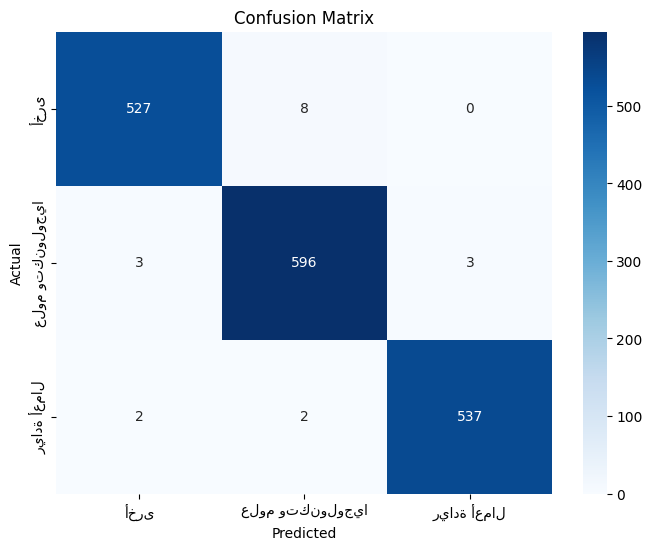

In [ ]:
# Plot the confusion matrix
cm = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=category_labels.keys(), yticklabels=category_labels.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# Deep Learning

In [ ]:
!pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
# Handle missing values
df = df.dropna()
df = df.reset_index(drop=True)

# Convert non-string values to string
df['Content'] = df['Content'].astype(str)

In [ ]:
# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['Content'])
train_sequences = tokenizer.texts_to_sequences(train_df['Content'])
test_sequences = tokenizer.texts_to_sequences(test_df['Content'])

In [ ]:
# Pad sequences to have the same length
max_length = 100  # Adjust this value based on your data
train_data = pad_sequences(train_sequences, maxlen=max_length)
test_data = pad_sequences(test_sequences, maxlen=max_length)

In [ ]:
# Convert categorical labels to numerical labels
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(train_df['Category'])
test_labels = label_encoder.transform(test_df['Category'])

In [ ]:
# Create the model
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, 100, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(len(df['Category'].unique()), activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model
H=model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=10, batch_size=32)

Epoch 1/10
210/210 [==============================] - 138s 647ms/step - loss: 0.4122 - accuracy: 0.8345 - val_loss: 0.2911 - val_accuracy: 0.9052
Epoch 2/10
210/210 [==============================] - 125s 597ms/step - loss: 0.0798 - accuracy: 0.9811 - val_loss: 0.1359 - val_accuracy: 0.9589
Epoch 3/10
210/210 [==============================] - 122s 579ms/step - loss: 0.0151 - accuracy: 0.9967 - val_loss: 0.1345 - val_accuracy: 0.9678
Epoch 4/10
210/210 [==============================] - 122s 582ms/step - loss: 0.0057 - accuracy: 0.9990 - val_loss: 0.1209 - val_accuracy: 0.9690
Epoch 5/10
210/210 [==============================] - 124s 591ms/step - loss: 7.6356e-04 - accuracy: 1.0000 - val_loss: 0.1642 - val_accuracy: 0.9678
Epoch 6/10
210/210 [==============================] - 132s 621ms/step - loss: 0.0053 - accuracy: 0.9996 - val_loss: 0.1521 - val_accuracy: 0.9666
Epoch 7/10
210/210 [==============================] - 123s 586ms/step - loss: 1.4052e-04 - accuracy: 1.0000 - val_loss: 

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

53/53 [==============================] - 3s 55ms/step - loss: 0.2084 - accuracy: 0.9684
Test Loss: 0.2084
Test Accuracy: 0.9684


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          15668000  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 15785635 (60.22 MB)
Trainable params: 15785635 (60.22 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


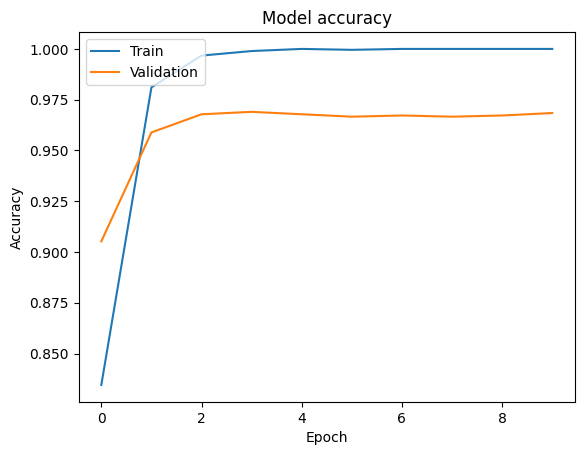

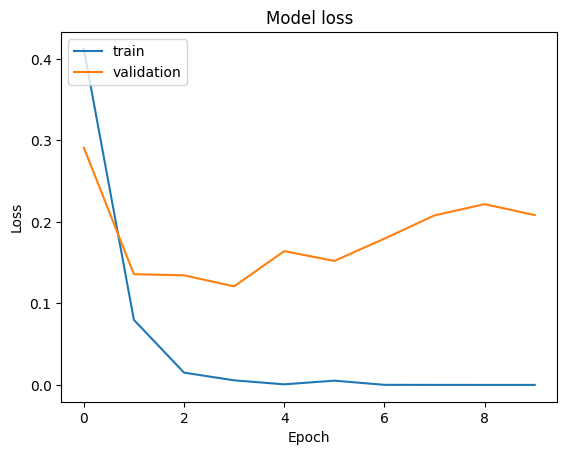

In [ ]:
#  Accuracy
import matplotlib.pyplot as plt


plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()